##DISCRETE COSINE TRANSFORM(DCT)
###This section demonstrates the Discrete Cosine Transform of an fashion_mnist dataset. As in the Jpeg standard the DCT is performed blockwise. The entire image is partitioned into non-overlapping blocks of size (8x8) pixels. The transformed image is backtransformed by applying the Inverse Discrete Cosine Transform (IDCT). The reconstructed image is identical to the original image

###Importing essential libraries

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm

In [ ]:
img0 = cv2.imread('/content/fashion_mnist/00000.jpg')
img1 = cv2.imread('/content/fashion_mnist/00005.jpg')
img2 = cv2.imread('/content/fashion_mnist/00003.jpg')
img3 = cv2.imread('/content/fashion_mnist/00001.jpg')
img4 = cv2.imread('/content/fashion_mnist/00002.jpg')
img5 = cv2.imread('/content/fashion_mnist/00004.jpg')
img6 = cv2.imread('/content/fashion_mnist/00006.jpg')
img7 = cv2.imread('/content/fashion_mnist/00007.jpg')
img8 = cv2.imread('/content/fashion_mnist/00008.jpg')
img9 = cv2.imread('/content/fashion_mnist/00009.jpg')

Text(0.5, 1.0, 'Tenth')

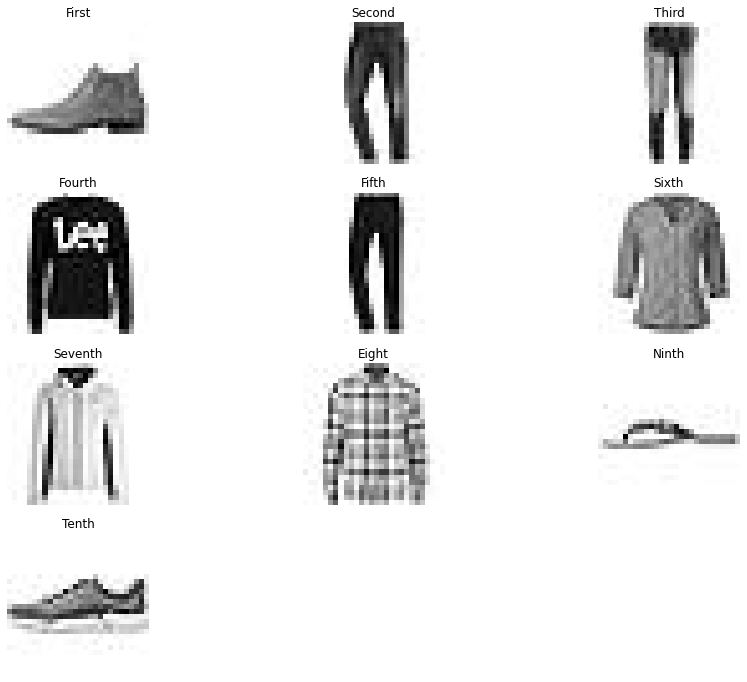

In [ ]:
# create figure
fig = plt.figure(figsize=(15, 12))
  
# setting values to rows and column variables
rows = 4
columns = 3
    
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(img0)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(img1)
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(img2)
plt.axis('off')
plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(img3)
plt.axis('off')
plt.title("Fourth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(img4)
plt.axis('off')
plt.title("Fifth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(img5)
plt.axis('off')
plt.title("Sixth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(img6)
plt.axis('off')
plt.title("Seventh")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 8)
  
# showing image
plt.imshow(img7)
plt.axis('off')
plt.title("Eight")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 9)
  
# showing image
plt.imshow(img8)
plt.axis('off')
plt.title("Ninth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 10)
  
# showing image
plt.imshow(img9)
plt.axis('off')
plt.title("Tenth")

###The height and width of the blocks is B=8. An image is imported and transformed to a grayscale image. Moreover, the image is cropped, such that its height and width is a multiple of the blocksize B.

In [ ]:
B=8 #blocksize
fn0='/content/fashion_mnist/00000.jpg'
img0 = cv2.imread(fn0, cv2.IMREAD_GRAYSCALE)
h,w=np.array(img0.shape[:2])/B * B
h=int(h)
w=int(w)
img0=img0[:h,:w]


fn1='/content/fashion_mnist/00001.jpg'
img1 = cv2.imread(fn1, cv2.IMREAD_GRAYSCALE)
h,w=np.array(img1.shape[:2])/B * B
h=int(h)
w=int(w)
img1=img1[:h,:w]

fn2='/content/fashion_mnist/00002.jpg'
img2 = cv2.imread(fn2, cv2.IMREAD_GRAYSCALE)
h,w=np.array(img2.shape[:2])/B * B
h=int(h)
w=int(w)
img2=img2[:h,:w]

fn3='/content/fashion_mnist/00003.jpg'
img3 = cv2.imread(fn3, cv2.IMREAD_GRAYSCALE)
h,w=np.array(img3.shape[:2])/B * B
h=int(h)
w=int(w)
img3=img3[:h,:w]

fn4='/content/fashion_mnist/00004.jpg'
img4 = cv2.imread(fn4, cv2.IMREAD_GRAYSCALE)
h,w=np.array(img4.shape[:2])/B * B
h=int(h)
w=int(w)
img4=img4[:h,:w]

fn5='/content/fashion_mnist/00005.jpg'
img5 = cv2.imread(fn5, cv2.IMREAD_GRAYSCALE)
h,w=np.array(img5.shape[:2])/B * B
h=int(h)
w=int(w)
img15=img5[:h,:w]

fn6='/content/fashion_mnist/00006.jpg'
img6 = cv2.imread(fn6, cv2.IMREAD_GRAYSCALE)
h,w=np.array(img6.shape[:2])/B * B
h=int(h)
w=int(w)
img6=img6[:h,:w]

fn7='/content/fashion_mnist/00007.jpg'
img7 = cv2.imread(fn7, cv2.IMREAD_GRAYSCALE)
h,w=np.array(img7.shape[:2])/B * B
h=int(h)
w=int(w)
img7=img7[:h,:w]

fn8='/content/fashion_mnist/00008.jpg'
img8 = cv2.imread(fn8, cv2.IMREAD_GRAYSCALE)
h,w=np.array(img1.shape[:2])/B * B
h=int(h)
w=int(w)
img8=img8[:h,:w]

fn9='/content/fashion_mnist/00009.jpg'
img9 = cv2.imread(fn9, cv2.IMREAD_GRAYSCALE)
h,w=np.array(img9.shape[:2])/B * B
h=int(h)
w=int(w)
img9=img9[:h,:w]

###For each block in the image the DCT is applied. The transformed image is stored in the variable Trans and it is saved to the file Transformed.jpg:

In [ ]:
blocksV=int(h/B)
blocksH=int(w/B)
vis0 = np.zeros((h,w), np.float32)
Trans0 = np.zeros((h,w), np.float32)
vis0[:h, :w] = img0
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                Trans0[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('Transformed0.jpg', Trans0)


Trans1 = np.zeros((h,w), np.float32)
vis0[:h, :w] = img1
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                Trans1[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('Transformed1.jpg', Trans1)


Trans2 = np.zeros((h,w), np.float32)
vis0[:h, :w] = img2
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                Trans2[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('Transformed2.jpg', Trans2)


Trans3 = np.zeros((h,w), np.float32)
vis0[:h, :w] = img3
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                Trans3[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('Transformed3.jpg', Trans3)


Trans4 = np.zeros((h,w), np.float32)
vis0[:h, :w] = img4
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                Trans4[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('Transformed4.jpg', Trans4)


Trans5 = np.zeros((h,w), np.float32)
vis0[:h, :w] = img5
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                Trans5[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('Transformed5.jpg', Trans5)


Trans6 = np.zeros((h,w), np.float32)
vis0[:h, :w] = img6
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                Trans6[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('Transformed6.jpg', Trans6)


Trans7 = np.zeros((h,w), np.float32)
vis0[:h, :w] = img7
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                Trans7[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('Transformed7.jpg', Trans7)


Trans8 = np.zeros((h,w), np.float32)
vis0[:h, :w] = img8
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                Trans8[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('Transformed8.jpg', Trans8)


Trans9 = np.zeros((h,w), np.float32)
vis0[:h, :w] = img9
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.dct(vis0[row*B:(row+1)*B,col*B:(col+1)*B])
                Trans9[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('Transformed9.jpg', Trans9)

True

In [ ]:
Transformed_image0 = cv2.imread('Transformed0.jpg')
Transformed_image1 = cv2.imread('Transformed1.jpg')
Transformed_image2 = cv2.imread('Transformed2.jpg')
Transformed_image3 = cv2.imread('Transformed3.jpg')
Transformed_image4 = cv2.imread('Transformed4.jpg')
Transformed_image5 = cv2.imread('Transformed5.jpg')
Transformed_image6 = cv2.imread('Transformed6.jpg')
Transformed_image7 = cv2.imread('Transformed7.jpg')
Transformed_image8 = cv2.imread('Transformed8.jpg')
Transformed_image9 = cv2.imread('Transformed9.jpg')

Text(0.5, 1.0, 'Tenth')

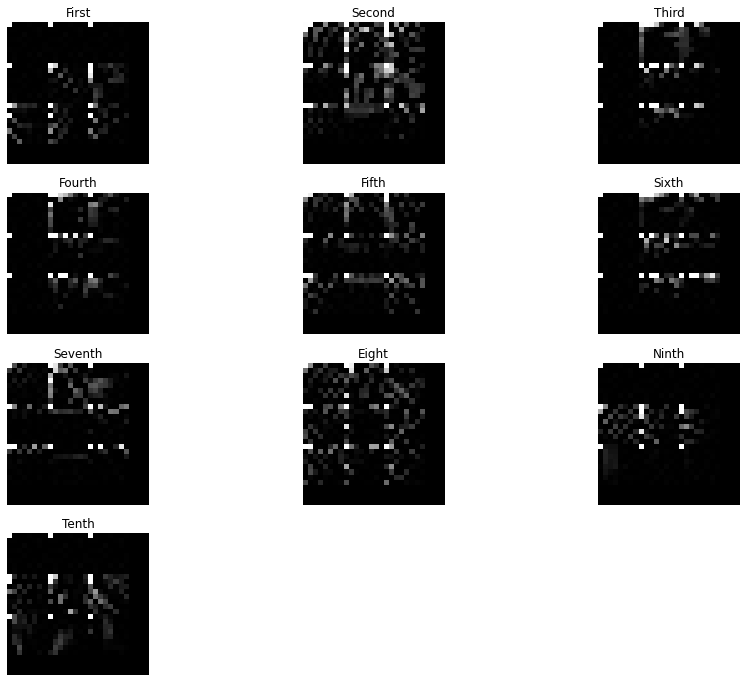

In [ ]:
# create figure
fig = plt.figure(figsize=(15, 12))
  
# setting values to rows and column variables
rows = 4
columns = 3
    
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Transformed_image0)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Transformed_image1)
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Transformed_image2)
plt.axis('off')
plt.title("Third")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Transformed_image3)
plt.axis('off')
plt.title("Fourth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 5)
  
# showing image
plt.imshow(Transformed_image4)
plt.axis('off')
plt.title("Fifth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 6)
  
# showing image
plt.imshow(Transformed_image5)
plt.axis('off')
plt.title("Sixth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 7)
  
# showing image
plt.imshow(Transformed_image6)
plt.axis('off')
plt.title("Seventh")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 8)
  
# showing image
plt.imshow(Transformed_image7)
plt.axis('off')
plt.title("Eight")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 9)
  
# showing image
plt.imshow(Transformed_image8)
plt.axis('off')
plt.title("Ninth")

# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 10)
  
# showing image
plt.imshow(Transformed_image9)
plt.axis('off')
plt.title("Tenth")

Then the IDCT is applied to reconstruct the original image from the transformed representation. The reconstructed image is stored in the variable back0 and it is saved to the file BackTransformed.jpg

In [ ]:
back0 = np.zeros((h,w), np.float32)
for row in range(blocksV):
        for col in range(blocksH):
                currentblock = cv2.idct(Trans0[row*B:(row+1)*B,col*B:(col+1)*B])
                back0[row*B:(row+1)*B,col*B:(col+1)*B]=currentblock
cv2.imwrite('BackTransformed0.jpg', back0)

True

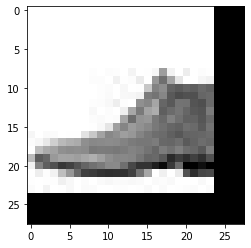

In [ ]:
BackTransformed_image0 = cv2.imread('BackTransformed0.jpg')
plt.imshow(BackTransformed_image0)